IMPORTING NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

READING THE DATA SET

In [2]:
data=pd.read_csv('/content/USArrests.csv')

CHECKING THE BASIC DETAILS

In [3]:
data.head(10)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
data.tail(10)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
40,South Dakota,3.8,86,45,12.8
41,Tennessee,13.2,188,59,26.9
42,Texas,12.7,201,80,25.5
43,Utah,3.2,120,80,22.9
44,Vermont,2.2,48,32,11.2
45,Virginia,8.5,156,63,20.7
46,Washington,4.0,145,73,26.2
47,West Virginia,5.7,81,39,9.3
48,Wisconsin,2.6,53,66,10.8
49,Wyoming,6.8,161,60,15.6


In [5]:
data.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

RENAME THE COLUMN NAME

In [6]:

data.rename(columns = {'Unnamed: 0':'Regions In USA'}, inplace = True)

In [7]:
data.head(10)

,Regions In USA,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [8]:
data.shape

(50, 5)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Regions In USA  50 non-null     object 
 1   Murder          50 non-null     float64
 2   Assault         50 non-null     int64  
 3   UrbanPop        50 non-null     int64  
 4   Rape            50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [10]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


DATA PREPROCESSING

CHECKING THE MISSING VALUES

In [11]:
data.isna().sum()

Regions In USA    0
Murder            0
Assault           0
UrbanPop          0
Rape              0
dtype: int64

LABEL ENCODING





In [15]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
data['Regions In USA']= label_encoder.fit_transform(data['Regions In USA'])
  

In [16]:
data.head(10)

,Regions In USA,Murder,Assault,UrbanPop,Rape
0,0,13.2,236,58,21.2
1,1,10.0,263,48,44.5
2,2,8.1,294,80,31.0
3,3,8.8,190,50,19.5
4,4,9.0,276,91,40.6
5,5,7.9,204,78,38.7
6,6,3.3,110,77,11.1
7,7,5.9,238,72,15.8
8,8,15.4,335,80,31.9
9,9,17.4,211,60,25.8


STANDARD SCALING

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)
scaled_data=pd.DataFrame(scaled_data)
scaled_data.describe().round(2)

,0,1,2,3,4
count,50.00,50.00,50.00,50.00,50.00
mean,0.00,-0.00,0.00,-0.00,0.00
std,1.01,1.01,1.01,1.01,1.01
min,-1.70,-1.62,-1.52,-2.34,-1.50
25%,-0.85,-0.86,-0.75,-0.77,-0.66
50%,0.00,-0.12,-0.14,0.03,-0.12
75%,0.85,0.80,0.95,0.85,0.53
max,1.70,2.23,2.02,1.78,2.67


PAIR PLOT

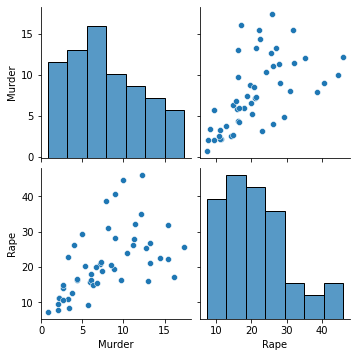

In [21]:
sns.pairplot(data=data)

PRINCIPLE COMPONENT ANALYSIS

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
x_pca.shape

(50, 2)

FROM 5 COLUMNS ,WE CAN REDUCED TO 2 COLUMNS

In [23]:
# displaying the PCA components
pca.components_

array([[-0.29627163,  0.50351939,  0.55768182,  0.27173422,  0.52329995],
       [ 0.28114842,  0.46401739,  0.22941525, -0.79964093, -0.11656099]])

K-MEANS CLUSTERING

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


182.13154393867762
81.6134469070308
59.62563299494694


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


39.21798448194063
32.142817307353724
25.363040040046844


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


19.861057880057693
16.548097394214196


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


13.777328160926693
11.543366432349817


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


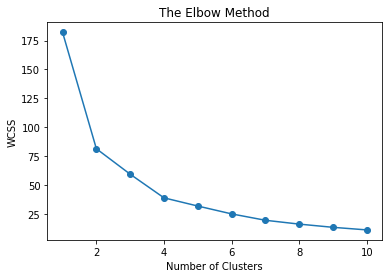

In [24]:
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
  #instance
  kmeans=KMeans(n_clusters=k,init='k-means++',random_state=42)
  kmeans.fit(x_pca)
  #Calculating WCSS
  wcss.append(kmeans.inertia_)
  print(kmeans.inertia_)
plt.plot(range(1,11),wcss,'o-')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

FROM THE ABOVE GRAPH ,USING ELBOW METHOD WE GET OPTIMAL NUMBER OF CLUSTERS AS 3

In [25]:
#k-means
model_kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=model_kmeans.fit_predict(x_pca)
print(y_kmeans)
print(model_kmeans.inertia_)
print(model_kmeans)

[1 1 1 1 1 1 0 0 1 1 0 2 1 0 2 0 2 1 2 1 0 1 0 1 1 2 2 1 2 0 1 1 1 2 0 0 0
 0 0 1 2 1 1 0 2 2 0 2 2 2]
59.62563299494694
KMeans(n_clusters=3, random_state=42)


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


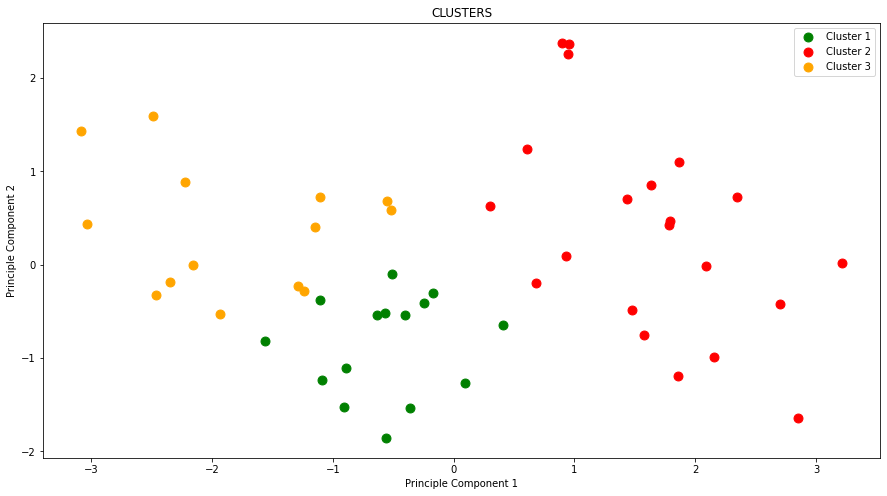

In [27]:
plt.figure(figsize=(15,8))
plt.scatter(x_pca[y_kmeans == 0, 0],x_pca[y_kmeans == 0, 1] ,s=80,c='green',label= 'Cluster 1')
plt.scatter(x_pca[y_kmeans == 1, 0],x_pca[y_kmeans == 1, 1] ,s=80,c='red',label= 'Cluster 2')
plt.scatter(x_pca[y_kmeans == 2, 0],x_pca[y_kmeans == 2, 1] ,s=80,c='orange',label= 'Cluster 3')
plt.title('CLUSTERS')
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.legend()
plt.show()

AGGLOMERATIVE HEIRARCHIAL CLUSTERING

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [20.0, 20.0, 52.5, 52.5],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [135.0, 135.0, 152.5, 152.5],
  [112.5, 112.5, 143.75, 143.75],
  [175.0, 175.0, 185.0, 185.0],
  [195.0, 195.0, 205.0, 205.0],
  [180.0, 180.0, 200.0, 200.0],
  [128.125, 128.125, 190.0, 190.0],
  [82.5, 82.5, 159.0625, 159.0625],
  [36.25, 36.25, 120.78125, 120.78125],
  [215.0, 215.0, 225.0, 225.0],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [220.0, 220.0, 242.5, 242.5],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [272.5, 272.5, 302.5, 302.5],
  [325.0, 325.0, 335.0, 335.0],
  [287.5, 287.5, 330.0, 330.0],
  [231.25, 231

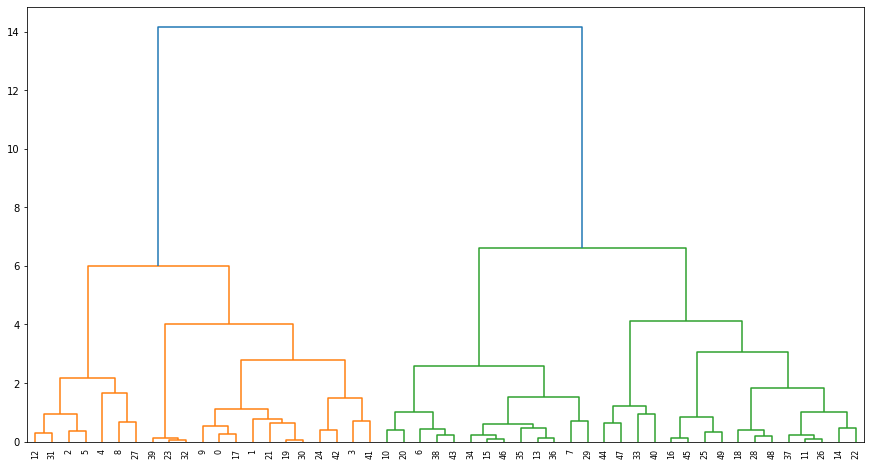

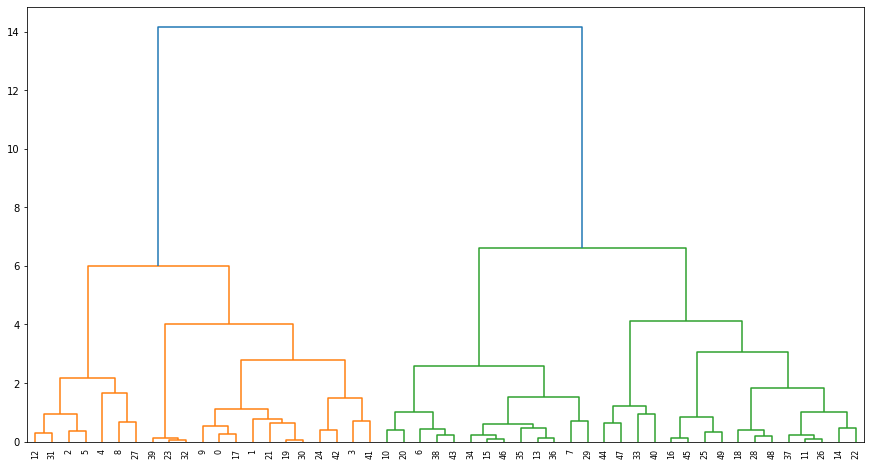

In [28]:
#using dendrogram to find the optimal number of clustering
from scipy.cluster.hierarchy import dendrogram,linkage
#create instance 
linked=linkage(x_pca,method='ward')
plt.figure(figsize=(15,8))
dendrogram(linked,orientation='top',distance_sort='ascending',show_leaf_counts=True)
#using dendrogram to find the optimal number of clustering
from scipy.cluster.hierarchy import dendrogram,linkage
#create instance 
linked=linkage(x_pca,method='ward')
plt.figure(figsize=(15,8))
dendrogram(linked,orientation='top',distance_sort='ascending',show_leaf_counts=True)

Using dendrograms we have to find optimal number of clusters by the condition: Largest vertical distance such that no horizontal line cut it.

Optimal number of clusters=3

In [29]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(x_pca)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [30]:
y_hc

array([0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 1, 0, 2, 1, 2, 1, 0, 1, 0, 2, 0,
       1, 0, 0, 1, 1, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 1, 2, 0, 1, 0, 0, 2,
       1, 1, 2, 1, 1, 1])

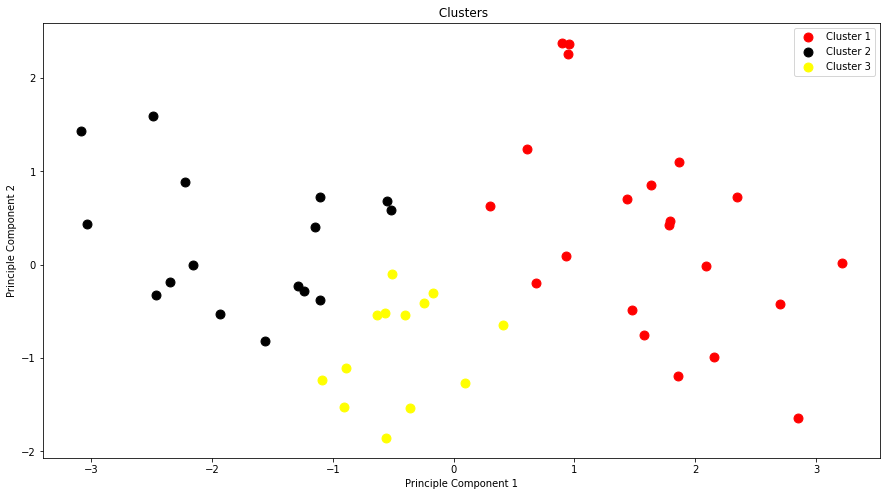

In [32]:
plt.figure(figsize=(15,8))
plt.scatter(x_pca[y_hc == 0, 0],x_pca[y_hc == 0, 1] ,s=80,c='red',label= 'Cluster 1')
plt.scatter(x_pca[y_hc == 1, 0],x_pca[y_hc == 1, 1] ,s=80,c='black',label= 'Cluster 2')
plt.scatter(x_pca[y_hc == 2, 0],x_pca[y_hc == 2, 1] ,s=80,c='yellow',label= 'Cluster 3')
plt.title(' Clusters')
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.legend()